In [213]:
#Creating Clusters of MLB Players to find archetypes.
#Author: Chris Galgano
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

In [214]:
#Reading in the data
Batting_stats = pd.read_csv("Batting_Stats_Fixed.csv")
print(Batting_stats)

      Rk              Name  Age   Tm   Lg    G   PA   AB    R    H  ...  \
0      1        CJ Abrams*   22  WSN   NL  151  614  563   83  138  ...   
1      2        José Abreu   36  HOU   AL  141  594  540   62  128  ...   
2      3     Wilyer Abreu*   24  BOS   AL   28   85   76   10   24  ...   
3      4  Ronald Acuna Jr.   25  ATL   NL  159  735  643  149  217  ...   
4      5      Willy Adames   27  MIL   NL  149  638  553   73  120  ...   
..   ...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
892  893      Jared Young*   27  CHC   NL   16   47   43    8    8  ...   
893  894       Seby Zavala   29  TOT  MLB   73  193  175   17   30  ...   
894  895       Seby Zavala   29  CHW   AL   66  176  161   15   25  ...   
895  896       Seby Zavala   29  ARI   NL    7   17   14    2    5  ...   
896  897       Mike Zunino   32  CLE   AL   42  140  124   11   22  ...   

     Name-additional  PrimaryPos  1B  Pos_2B  Pos_3B  C  DH  OF  SP  SS  
0          abramcj01     

In [215]:
#Preparing data for K-means
over_400_PA = Batting_stats[Batting_stats["PA"]>400]
over_400_PA = over_400_PA.reset_index()
data_names = over_400_PA[["Name","PrimaryPos", "R", "HR", "RBI", "SB", "OBP"]]
data = data_names[["R", "HR", "RBI", "SB", "OBP"]]
print(data)

       R  HR  RBI  SB    OBP
0     83  18   64  47  0.300
1     62  18   90   0  0.296
2    149  41  106  73  0.416
3     73  24   80   5  0.310
4     96  33  109  13  0.336
..   ...  ..  ...  ..    ...
210   48  13   42  11  0.283
211   97  30   96  49  0.319
212   55   9   36   8  0.288
213  106  19   76  28  0.370
214   71  15   72   8  0.338

[215 rows x 5 columns]


In [216]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=["R", "HR", "RBI", "SB", "OBP"])


# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,R,HR,RBI,SB,OBP
count,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02
mean,1.321940e-16,-1.652425e-17,2.643880e-16,5.370381e-17,-6.609700e-16
std,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00
min,-1.882468e+00,-1.932657e+00,-1.979714e+00,-9.012286e-01,-2.647476e+00
25%,-6.907413e-01,-7.543293e-01,-8.048258e-01,-7.327380e-01,-6.596140e-01
50%,-2.089796e-01,-1.116049e-01,-5.289730e-02,-3.115116e-01,-1.262851e-01
75%,5.516968e-01,5.311196e-01,6.050402e-01,3.203280e-01,6.494661e-01
max,4.000096e+00,3.744742e+00,3.377777e+00,5.248677e+00,2.718136e+00


Text(0.5, 1.0, 'Accuracy of Clusters')

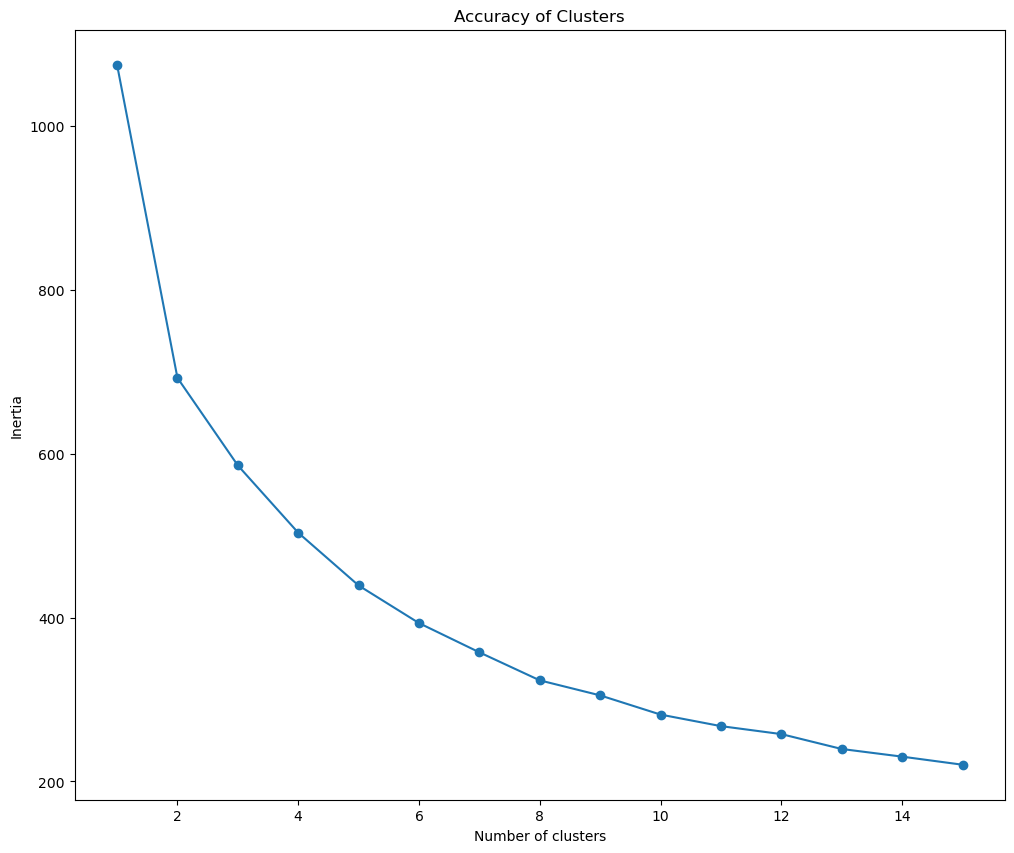

In [217]:
#Using Elbow method to determine best number of clusters, but on standardized data

SSE = [] #Empty area to add inertia values

#Iteration through each value of k and its respective inertia value
for cluster in range(1,16):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init = 10)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# Plotting results
frame = pd.DataFrame({'Cluster':range(1,16), 'SSE':SSE})
plt.figure(figsize=(12,10))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Accuracy of Clusters')

In [218]:
#K-means using 5 clusters
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=10,random_state=1234)
kmeans.fit(data_scaled)

#assigns cluster to each player
pred = kmeans.predict(data_scaled)
pred = pd.DataFrame(pred, columns= ["Cluster"])

#Joins clusters with the rest of the stats
with_clusters = data_names.join(pred)

group_representative = pd.DataFrame(kmeans.cluster_centers_)

#Undoes standardization on the group representatives
df_restored = scaler.inverse_transform(group_representative)
df_restored = pd.DataFrame(df_restored, columns=["R", "HR", "RBI", "SB", "OBP"])
df_restored = df_restored.round(decimals = 3)

print("New dataset with clusters: ")
print(with_clusters)
print()
print("Group Representatives: ")
print(df_restored)

New dataset with clusters: 
                  Name PrimaryPos    R  HR  RBI  SB    OBP  Cluster
0           CJ Abrams*         SS   83  18   64  47  0.300        4
1           José Abreu         1B   62  18   90   0  0.296        0
2     Ronald Acuna Jr.         OF  149  41  106  73  0.416        1
3         Willy Adames         SS   73  24   80   5  0.310        0
4        Ozzie Albies#         2B   96  33  109  13  0.336        1
..                 ...        ...  ...  ..  ...  ..    ...      ...
210        Joey Wiemer         OF   48  13   42  11  0.283        5
211         Bobby Witt         SS   97  30   96  49  0.319        4
212        Connor Wong          C   55   9   36   8  0.288        5
213  Christian Yelich*         OF  106  19   76  28  0.370        4
214  Masataka Yoshida*         OF   71  15   72   8  0.338        2

[215 rows x 8 columns]

Group Representatives: 
         R      HR      RBI      SB    OBP
0   65.509  22.132   76.868   4.415  0.314
1  107.450  36.300  1

In [219]:
#Comparing group representatives to season averages
averages =  data.mean()
against_average = df_restored - averages
print(against_average)

          R        HR        RBI         SB       OBP
0  -4.61193   3.09014   9.742419  -6.282674 -0.017907
1  37.32907  17.25814  36.724419   7.102326  0.026093
2  -7.79593  -4.39186 -13.350581  -3.897674  0.022093
3  15.87907   6.35114  15.767419  -4.340674  0.031093
4   9.55907  -1.88186  -2.605581  21.702326 -0.001907
5 -17.83493  -9.47086 -22.309581  -1.513674 -0.025907


In [220]:
print("Group 0, balanced hitter: ")
print( df_restored.iloc[0], '\n')

print("Group 1, Elite 5-tool hitter: ")
print( df_restored.iloc[1], '\n')

print("Group 2: contact hitter: ")
print( df_restored.iloc[2], '\n')

print("Group 3: : ")
print( df_restored.iloc[3], '\n')

print("Group 4: Speedy : ")
print( df_restored.iloc[4], '\n')

print("Group 6: Replacement Level: ")
print( df_restored.iloc[5], '\n')

Group 0, balanced hitter: 
R      65.509
HR     22.132
RBI    76.868
SB      4.415
OBP     0.314
Name: 0, dtype: float64 

Group 1, Elite 5-tool hitter: 
R      107.450
HR      36.300
RBI    103.850
SB      17.800
OBP      0.358
Name: 1, dtype: float64 

Group 2: contact hitter: 
R      62.325
HR     14.650
RBI    53.775
SB      6.800
OBP     0.354
Name: 2, dtype: float64 

Group 3: : 
R      86.000
HR     25.393
RBI    82.893
SB      6.357
OBP     0.363
Name: 3, dtype: float64 

Group 4: Speedy : 
R      79.68
HR     17.16
RBI    64.52
SB     32.40
OBP     0.33
Name: 4, dtype: float64 

Group 6: Replacement Level: 
R      52.286
HR      9.571
RBI    44.816
SB      9.184
OBP     0.306
Name: 5, dtype: float64 



In [221]:
with_clusters.to_csv('clusters.csv', encoding='utf-8')